In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pandas import Series, DataFrame
import nltk

import spacy
import string

from gensim import corpora, models, similarities

import tensorflow as tf
import tensorflow_hub as hub

from gensim.models import Word2Vec

In [2]:
from google.colab import files 
uploaded = files.upload() 

Saving train.csv to train.csv


In [3]:
df = pd.read_csv('train.csv')
len(df)

711

In [4]:
from google.colab import files 
uploaded = files.upload() 

Saving test.csv to test.csv


In [5]:
tdf = pd.read_csv('test.csv')
tdf

,CONTENT,label
0,mclean va oct 08 2019 globe newswire gladstone...,1
1,add detail background share sept 9 reuters fre...,0
2,acceleron pharma inc xlrn announce the discont...,0
3,corona ca accesswire october 3 2019 adomani in...,0
4,corona ca accesswire september 20 2019 adomani...,2
5,corona ca accesswire september 26 2019 adomani...,2
6,bloomberg tilman fertitta have to wait to land...,1
7,plan to resume trade on over the counter marke...,1
8,beijing may 23 2019 globe newswire chinacache ...,0
9,beijing aug 28 2019 globe newswire chinacache ...,1


In [0]:
x = df['CONTENT']
y = df['label']
x_test=tdf['CONTENT']
y_test=tdf['label']

In [7]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
SEED = 2000
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=.02, random_state=SEED)
print (x_train)

495    frankfurt detroit reuters a grow understanding...
67     tyson foods inc tsn a renowned meat product ma...
532    apergy apy come out with quarterly earning of ...
429    new york aug 6 2019 prnewswire attorney advert...
673    dublin july 31 2019 globe newswire the automot...
319    find a symbol when autocomplete result be avai...
381    talk about a call beyond belief mcdonald s ann...
231    new york reuters after month of handwring abou...
295    houston july 22 2019 prnewswire this month mrc...
131    net revenues increase 215 year over year to 40...
222    boston reuters medtronic plc say on tuesday -p...
347    this be a modal window beginning of dialog win...
445    new york sept 17 2019 prnewswire 360 finance i...
674    new york oct 9 2019 prnewswire commercial vehi...
334    source onfokus e getty images source onfokus e...
12     follow the legalization of sport bet outside n...
346    sculpture of water buffalo stand outside the e...
210    davita inc will pay 25 5

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [0]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print "null accuracy: {0:.2f}%".format(null_accuracy*100)
    print "accuracy score: {0:.2f}%".format(accuracy*100)
    if accuracy > null_accuracy:
        print "model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100)
    elif accuracy == null_accuracy:
        print "model has the same accuracy with the null accuracy"
    else:
        print "model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100)
    print "train and test time: {0:.2f}s".format(train_test_time)
    print "-"*80
    return accuracy, train_test_time

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(2000,100001,1000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print "\n"
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print "Validation result for {} features".format(n)
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [0]:
%%time
print "RESULT FOR UNIGRAM WITH STOP WORDS\n"
feature_result_ug = nfeature_accuracy_checker()

In [0]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS\n"
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

In [0]:
%%time
print "RESULT FOR TRIGRAM WITH STOP WORDS\n"
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
lr = LogisticRegression()
n_features = np.arange(2000,100001,1000)

def nfeature_accuracy_checker(vectorizer=tvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print "\n"
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print "Validation result for {} features".format(n)
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [0]:
%%time
print "RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)

In [0]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

In [0]:
%%time
print "RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

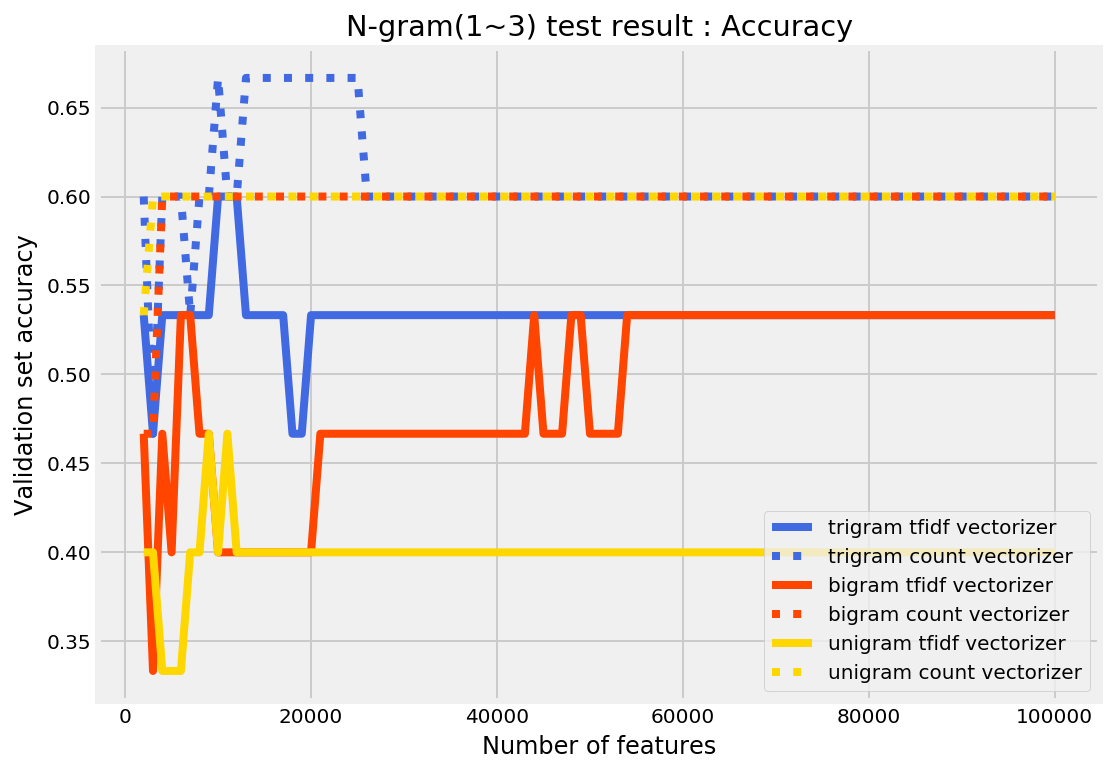

In [21]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

In [0]:
cvec = CountVectorizer()
def classifier_comparator(vectorizer=cvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print "Validation result for {}".format(n)
        print c
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

In [24]:
%%time
trigram_result = classifier_comparator(n_features=10000,ngram_range=(1,3))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
null accuracy: 80.00%
accuracy score: 66.67%
model is 13.33% less accurate than null accuracy
train and test time: 6.08s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 80.00%
accuracy score: 53.33%
model is 26.67% less accurate than null accuracy
train and test time: 7.17s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
        max_features=None, n...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
null accuracy: 80.00%
accuracy score: 46.67%
model is 33.33% less accurate than null accuracy
train and test time: 8.47s
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
null

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 80.00%
accuracy score: 66.67%
model is 13.33% less accurate than null accuracy
train and test time: 5.45s
--------------------------------------------------------------------------------
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 80.00%
accuracy score: 60.00%
model is 20.00% less accurate than null accuracy
train and test time: 5.71s
--------------------------------------------------------------------------------
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
null accuracy: 80.00%
accuracy score: 46.67%
model is 33.33% less accurate than null accuracy
train and test time: 5.60s
--------------------------------------------------------------------------------
CPU times: user 1min 6s, sys: 288 ms, total: 1min 7s
Wall time: 1min 7s


In [26]:
from sklearn.ensemble import VotingClassifier

clf1 = PassiveAggressiveClassifier()
clf2 = Perceptron()
clf3 = AdaBoostClassifier()
clf4 = LogisticRegression()
clf5 = RidgeClassifier()

eclf = VotingClassifier(estimators=[('pa', clf1), ('pc', clf2), ('AB', clf3), ('lr', clf4), ('RC', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['PassiveAggressiveClassifier', 'Perceptron', 'AdaBoostClassifier', 'LogisticRegression', 'RidgeClassifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=10000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print "Validation result for {}".format(label)
    print clf
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)

Validation result for PassiveAggressiveClassifier
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)
null accuracy: 80.00%
accuracy score: 66.67%
model is 13.33% less accurate than null accuracy
train and test time: 5.50s
--------------------------------------------------------------------------------
Validation result for Perceptron
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)
null accuracy: 80.00%
accuracy score: 60.00%
model is 20.00% less accurate than null accuracy